In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [568]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv '
data = pd.read_csv(url)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [569]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here I seen missing values

In [570]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here i seen some columns having object data type so convert into float64,Int64

In [571]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [572]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S


In [573]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [574]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [575]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [576]:
data['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

##### Convert into Numerical Formate using Label hot encoder

In [577]:
from sklearn.preprocessing import LabelEncoder

In [578]:
le = LabelEncoder()
le

LabelEncoder()

In [579]:
le.fit(data['Embarked'])

LabelEncoder()

In [580]:
data['Embarked']=le.transform(data['Embarked']) 
# Here we see that Embarked column data has converted
# S represent as 2
# c represent as 0
# q represent as 1

In [581]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


In [582]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [583]:
data['Embarked'].value_counts() # Here nan value replaced as 3(2 null values are present)

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [584]:
le.fit(data['Sex'])
data['Sex']=le.transform(data['Sex'])

In [585]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


1 represent as Male
0 represent as Female

#### Now filling missing values in Age with median

In [586]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [587]:
print(data['Age'])
# Mediun Value is 50%  -   28.000000

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [588]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [589]:
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Drop some columns of no use here columns such as Id,Name,Tickets and cabin

In [590]:
data.drop(data.columns[[0,3,8,-2]],axis=1,inplace=True)

In [591]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [592]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [593]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [594]:
data['Sex'].unique()

array([1, 0])

In [595]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [596]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [597]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [598]:
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [599]:
data['Embarked'].unique()

array([2, 0, 1, 3])

In [600]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


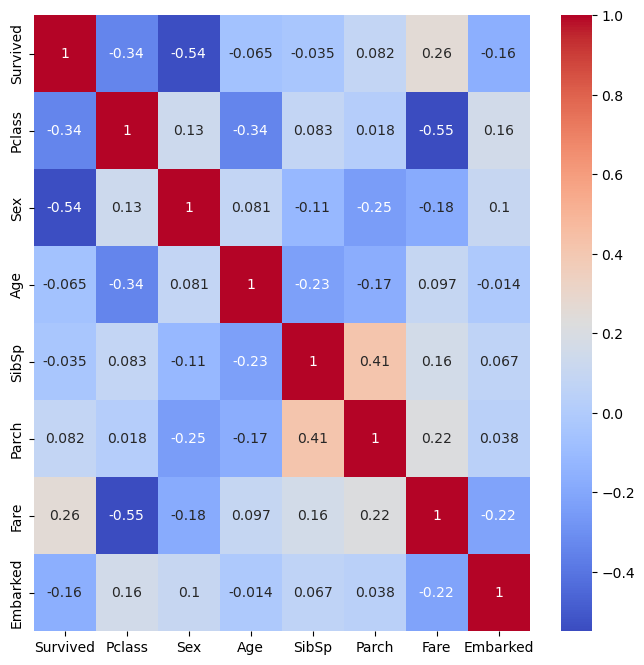

In [601]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

According to the heatmap observing Pclass is negative correlated with survived, sex is highly negative correlated with survived
According the data higher Pclass of passengers are higher chances to survived and paid higher fare are also to higher chance to survived

#### Data Distribution

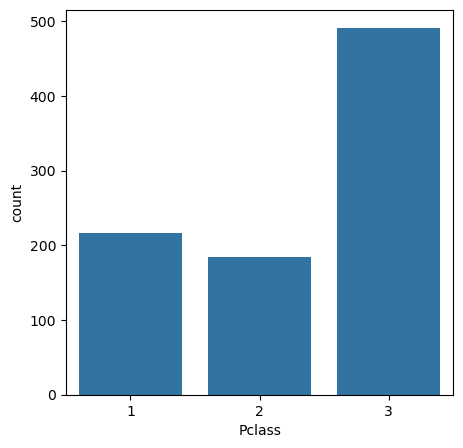

In [602]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass',data=data)
plt.show()

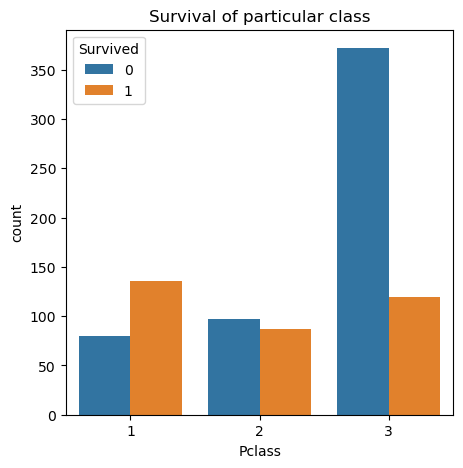

In [603]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass',hue ='Survived',data=data)
plt.title('Survival of particular class')
plt.show()

Pclass 1 is higher survival rate

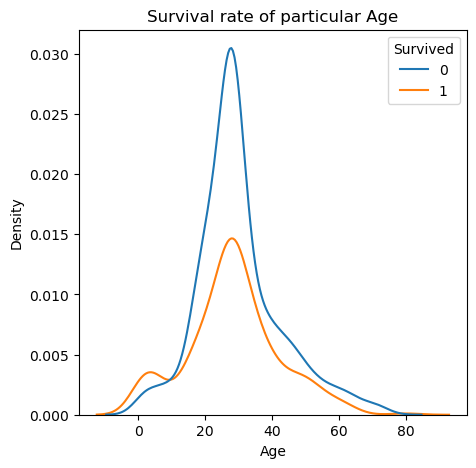

In [604]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='Age',hue ='Survived',data=data)
plt.title('Survival rate of particular Age')
plt.show()

Age between 20-40 are higher survival rate

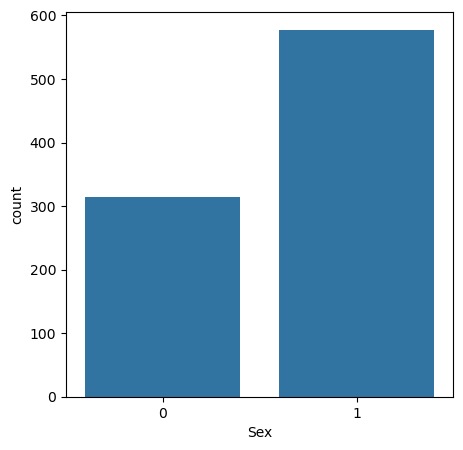

In [605]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex',data=data)
plt.show()

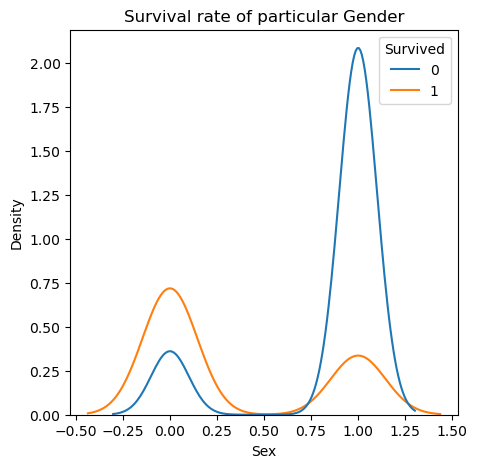

In [606]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='Sex',hue ='Survived',data=data)
plt.title('Survival rate of particular Gender') # male = 1, female = 0
plt.show()

Female survival rate is high than male

In [607]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Fare'>

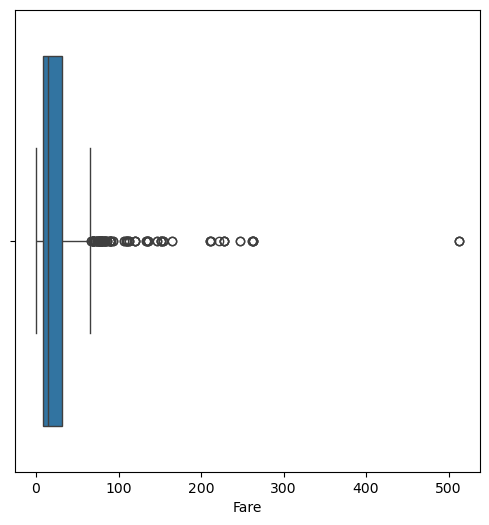

In [608]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Fare',data=data)

outliers are present in fare column

##### replace outlier with median

In [609]:
data.drop('Fare',axis=1,inplace=True)

#### Separate Variables

In [610]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [611]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2
...,...,...,...,...,...,...
886,2,1,27.0,0,0,2
887,1,0,19.0,0,0,2
888,3,0,28.0,1,2,2
889,1,1,26.0,0,0,0


In [612]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [613]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,0.581114
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,-1.938460
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,0.581114
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.581114
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,0.581114
...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,0.581114
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,0.581114
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,0.581114
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-1.938460


In [614]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [615]:
maxAccu = 0
maxRs = 0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print("Best accuracy is ",maxAccu,"at Random State ",maxRs)

Best accuracy is  0.8603351955307262 at Random State  18


In [616]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRs)


In [617]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8603351955307262
[[99 10]
 [15 55]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       109
           1       0.85      0.79      0.81        70

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [618]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8770949720670391
[[96 13]
 [ 9 61]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       109
           1       0.82      0.87      0.85        70

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.87       179
weighted avg       0.88      0.88      0.88       179



In [619]:
etc=ExtraTreesClassifier()

etc.fit(x_train,y_train)
etc.score(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8715083798882681
[[98 11]
 [12 58]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       109
           1       0.84      0.83      0.83        70

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [620]:
dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8212290502793296
[[94 15]
 [17 53]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       109
           1       0.78      0.76      0.77        70

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [621]:
gnb=GaussianNB()

gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8379888268156425
[[93 16]
 [13 57]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       109
           1       0.78      0.81      0.80        70

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [622]:
svc=SVC()

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8659217877094972
[[100   9]
 [ 15  55]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       109
           1       0.86      0.79      0.82        70

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.87      0.87      0.86       179



##### Validate performance of the model

In [623]:
from sklearn.model_selection import cross_val_score


In [624]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,predlr)-score.mean())

[0.79329609 0.78651685 0.78651685 0.75842697 0.82022472]
0.7889962965287804
Diff bet Acc score & CV score is : 0.07133889900194579


In [625]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,predrfc)-score.mean())

[0.75977654 0.80337079 0.81460674 0.82022472 0.83146067]
0.8058878915322328
Diff bet Acc score & CV score is : 0.07120708053480629


In [626]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,predetc)-score.mean())

[0.74860335 0.7752809  0.81460674 0.78089888 0.79775281]
0.7834285355596007
Diff bet Acc score & CV score is : 0.08807984432866744


In [627]:
score = cross_val_score(gnb,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,predgnb)-score.mean())

[0.73743017 0.76404494 0.79213483 0.79775281 0.80898876]
0.7800703031824744
Diff bet Acc score & CV score is : 0.05791852363316807


In [628]:
score = cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,preddtc)-score.mean())

[0.74301676 0.79775281 0.80898876 0.80337079 0.83146067]
0.7969179586968803
Diff bet Acc score & CV score is : 0.024311091582449262


In [629]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Diff bet Acc score & CV score is :', accuracy_score(y_test,predsvc)-score.mean())

[0.83798883 0.8258427  0.81460674 0.79213483 0.86516854]
0.8271483271608812
Diff bet Acc score & CV score is : 0.03877346054861608


##### Decision Tree Classifier is the best Model because the diff between acc score and cv score is less

#### Hyper_Parameter Tunning

In [630]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],
                'random_state' :[10,50,100,300],
                'max_depth' :  [0,10,20],
              'splitter':['best', 'random']
             }
                
            

In [631]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'random_state': [10, 50, 100, 300],
                         'splitter': ['best', 'random']})

In [632]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'random_state': 10,
 'splitter': 'random'}

In [633]:
final_model = DecisionTreeClassifier(criterion='entropy',max_depth= 10,splitter='random',random_state= 50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


83.79888268156425


In [ ]:
Conclusion:
Model performance was good
- More survival chances for higher class passengers, females, age between 20-40, 

#### Saving The model

In [634]:
import joblib

In [635]:
joblib.dump(final_model, 'Titanic_Survival_Analysis.pkl')

['Titanic_Survival_Analysis.pkl']